In [1]:
import requests
from bs4 import BeautifulSoup as BS
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm
import statsmodels.graphics as g
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()

In [2]:
# Read in data

US = pd.read_csv('../data/us_rep_elections.csv')
US

,district,name,party,incumbent,winner,raised,spent
0,AL01,Jerry Carl,R,False,True,1971321,1859349
1,AL01,James Averhart,D,False,False,80095,78973
2,AL02,Barry Moore,R,False,True,650807,669368
3,AL02,Phyllis Harvey-Hall,D,False,False,56050,55988
4,AL03,Mike D Rogers,R,True,True,1193111,1218564
...,...,...,...,...,...,...,...
889,WI07,Tricia Zunker,D,False,False,1261957,1232690
890,WI08,Mike Gallagher,R,True,True,3202905,2841801
891,WI08,Amanda Stuck,D,False,False,416978,399916
892,WY01,Liz Cheney,R,True,True,3003883,3060167


# Problem 4b

How often does the candidate who spent more money win a race?

In [5]:
US['spent_more'] = US['spent'] == US.groupby('district')['spent'].transform('max')

In [20]:
buywins = US.groupby('spent_more')['winner'].agg(['sum', 'mean']).reset_index(drop = False)
buywins

,spent_more,sum,mean
0,False,50,0.108932
1,True,381,0.875862


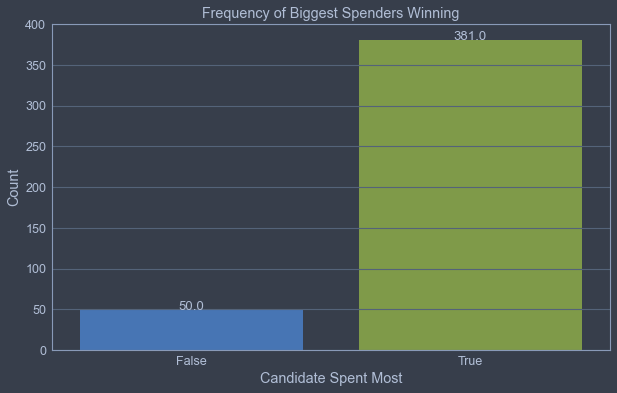

In [36]:
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(x = 'spent_more',
            y = 'sum',
            data = buywins,
           )

ax.set(xlabel = "Candidate Spent Most",
       ylabel = "Count",
       title = "Frequency of Biggest Spenders Winning"
       )

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)